In [35]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Flatten , MaxPooling2D , Conv2D
from tensorflow.keras import datasets
from tensorflow.keras.optimizers import Adam

In [36]:
import matplotlib.pyplot as plt

In [37]:
(x_train,y_train) , (x_test,y_test) = datasets.cifar10.load_data()

In [38]:
x_train = x_train/255.0
x_test = x_test/255.0

In [39]:
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

In [40]:
x_train.shape

(50000, 32, 32, 3)

In [41]:
x_test.shape


(10000, 32, 32, 3)

In [42]:
y_test.shape

(10000, 10)

In [43]:
model = Sequential(
    [
        Conv2D(32 , (3,3) , activation = 'relu' , input_shape = (32,32,3)),
        MaxPooling2D((2,2)),
        Conv2D(64,(3,3),activation = 'relu'),
        MaxPooling2D((2,2)),
        Conv2D(64 , (3,3),activation = 'relu'),
        Flatten(),
        Dense(64,activation = 'relu'),
        Dense(10 , activation = 'softmax')
    ]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [46]:
history = model.fit(x_train , y_train , epochs=5 , batch_size=32 , validation_data=(x_test,y_test) )


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 50ms/step - accuracy: 0.2997 - loss: 0.2869 - val_accuracy: 0.5044 - val_loss: 0.2158
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 51ms/step - accuracy: 0.5364 - loss: 0.2064 - val_accuracy: 0.5971 - val_loss: 0.1825
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 48ms/step - accuracy: 0.6100 - loss: 0.1804 - val_accuracy: 0.6317 - val_loss: 0.1699
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 49ms/step - accuracy: 0.6546 - loss: 0.1625 - val_accuracy: 0.6419 - val_loss: 0.1669
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 47ms/step - accuracy: 0.6780 - loss: 0.1522 - val_accuracy: 0.6819 - val_loss: 0.1500


In [47]:
test_loss , test_acc = model.evaluate(x_test,y_test)
print("loss - ",test_loss)
print("accuracy - ",test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6862 - loss: 0.1483
loss -  0.14999522268772125
accuracy -  0.6819000244140625


In [52]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step


Actual values ==  1
Predicted value ==  1


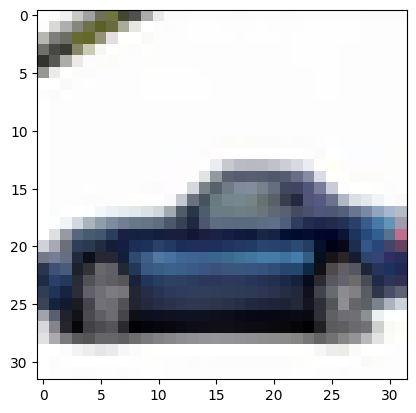

In [54]:
n = 105
plt.imshow(x_test[n])
print("Actual values == " , np.argmax(y_test[n]))
print("Predicted value == " , np.argmax(y_pred[n]))

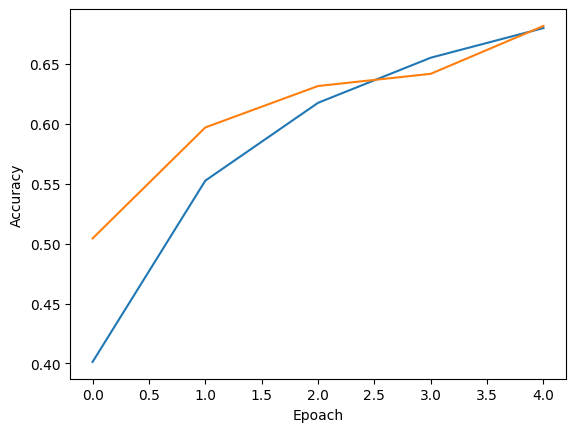

In [56]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epoach")
plt.ylabel("Accuracy")
plt.show()

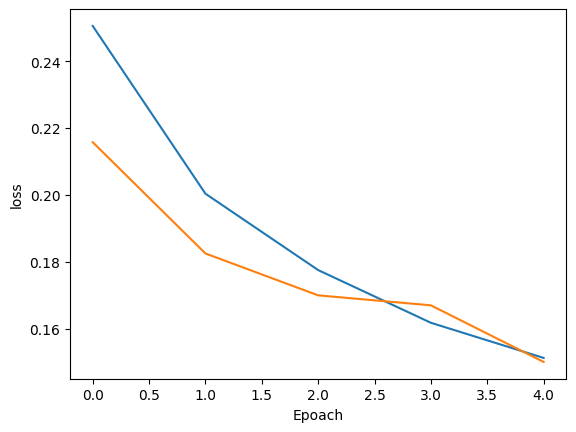

In [61]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epoach")
plt.ylabel("loss")
plt.show()

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Input,Flatten
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix , classification_report

In [141]:
df = pd.read_csv("ecg_autoencoder_dataset.csv",header=None)
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1


In [142]:
X = df.drop([140] , axis =1)
Y = df[140]

In [162]:
x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size = 0.3,random_state=42)

In [163]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [164]:
encoder = Sequential([
    Input(shape=(x_train.shape[1],)),
    Dense(64 , activation = 'relu'),
    Dense(32 , activation = 'relu'),
    Dense(16 , activation = 'relu'),
])

In [165]:
decoder = Sequential([
    Input(shape =(16,)),
    Dense(32,activation='relu'),
    Dense(64,activation='relu'),
    Dense(x_train.shape[1] , activation='linear')
])

In [166]:
autoencoder = Sequential([
    encoder,
    decoder
])

In [167]:
autoencoder.compile(optimizer = 'adam',loss = 'mean_squared_error',metrics=['accuracy'])

In [168]:
history = autoencoder.fit(x_train,y_train,epochs = 100 ,  shuffle = True , validation_data = (x_test,y_test))

Epoch 1/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0027 - loss: 0.2679 - val_accuracy: 6.6667e-04 - val_loss: 0.0115
Epoch 2/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0016 - loss: 0.0121 - val_accuracy: 0.0073 - val_loss: 0.0093
Epoch 3/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0036 - loss: 0.0071 - val_accuracy: 0.0073 - val_loss: 0.0081
Epoch 4/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0052 - loss: 0.0072 - val_accuracy: 0.0067 - val_loss: 0.0067
Epoch 5/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0068 - loss: 0.0058 - val_accuracy: 0.0040 - val_loss: 0.0069
Epoch 6/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0066 - loss: 0.0053 - val_accuracy: 0.0047 - val_loss: 0.0076
Epoch 7/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0068 - loss: 0.0049 - val_accuracy: 0.0047 - val_loss: 0.0061
Epoch 8/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0021 - loss: 0.0037 - val_

In [169]:
test_loss , test_acc = autoencoder.evaluate(x_test,y_test)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0029


In [170]:
predictions = autoencoder.predict(x_test)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [172]:
mse = np.mean((x_test-predictions)**2 , axis =1)
threshold = np.percentile(mse , 95)
outlier = mse > threshold

confusion_matrix(y_test , outlier)


array([[592,  30],
       [833,  45]])

In [173]:
print("\n" , classification_report(y_test , outlier))


               precision    recall  f1-score   support

           0       0.42      0.95      0.58       622
           1       0.60      0.05      0.09       878

    accuracy                           0.42      1500
   macro avg       0.51      0.50      0.34      1500
weighted avg       0.52      0.42      0.30      1500



In [174]:
anomalies = np.sum(y_test[outlier] == 1)
print("no. of anamolies == " , anomalies)

no. of anamolies ==  45


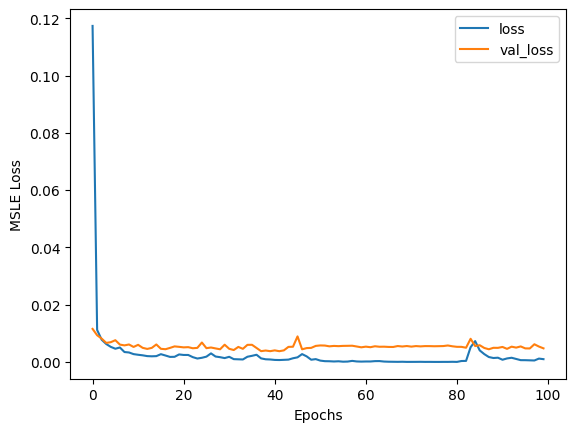

In [176]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('MSLE Loss')
plt.legend(['loss', 'val_loss'])
plt.show()